# **CREDIT RISK PREDICTION**

**1. Importing Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler # used to covert categorical data into numerical data
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report,roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier as xgb

import warnings
warnings.filterwarnings("ignore")

**2. Data Collection and Exploration**

In [2]:
# Data Collection
crd_data = pd.read_csv('/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv')
crd_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
# Understanding the dataset
crd_data.info()   # to check the info about the data like data types and all.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
# Checking for Duplicate and missing values
print("Duplicate Rows:", len(crd_data) - len(crd_data.drop_duplicates()))
print("Null Rows:", crd_data.isnull().all(axis = 1).sum())

Duplicate Rows: 165
Null Rows: 0


In [5]:
# Summary Stats
crd_data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [6]:
# Unique values per column
crd_data.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [7]:
# Percentage of Missing Values
null_rows = pd.DataFrame(crd_data.isnull().sum(), columns = ['Count'])
null_rows['Perc'] = round(crd_data.isnull().sum()/crd_data.shape[0] * 100,2)
null_rows

,Count,Perc
person_age,0,0.00
person_income,0,0.00
person_home_ownership,0,0.00
person_emp_length,895,2.75
loan_intent,0,0.00
loan_grade,0,0.00
loan_amnt,0,0.00
loan_int_rate,3116,9.56
loan_status,0,0.00
loan_percent_income,0,0.00


**3. Data Wrangling**

In [8]:
# Removing missing and duplicate data
crd_data.dropna(inplace = True)
crd_data.drop_duplicates(inplace = True)

# Filling missing values in columns
crd_data['person_emp_length'].fillna(crd_data['person_emp_length'].median())
crd_data['loan_int_rate'].fillna(crd_data['loan_int_rate'].mean())

# Saving changes
cleaned_df = crd_data.copy()

# Checking for missing values
cleaned_df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

**4. Data Preprocessing**

In [9]:
# converting categorical data to numerical data to visualize. 
categorical = ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']

for col in categorical:
    le = LabelEncoder()
    cleaned_df[col] = le.fit_transform(cleaned_df[col])

cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28501 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28501 non-null  int64  
 1   person_income               28501 non-null  int64  
 2   person_home_ownership       28501 non-null  int64  
 3   person_emp_length           28501 non-null  float64
 4   loan_intent                 28501 non-null  int64  
 5   loan_grade                  28501 non-null  int64  
 6   loan_amnt                   28501 non-null  int64  
 7   loan_int_rate               28501 non-null  float64
 8   loan_status                 28501 non-null  int64  
 9   loan_percent_income         28501 non-null  float64
 10  cb_person_default_on_file   28501 non-null  int64  
 11  cb_person_cred_hist_length  28501 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 2.8 MB


**5. Exploratory Data Analysis (EDA)**

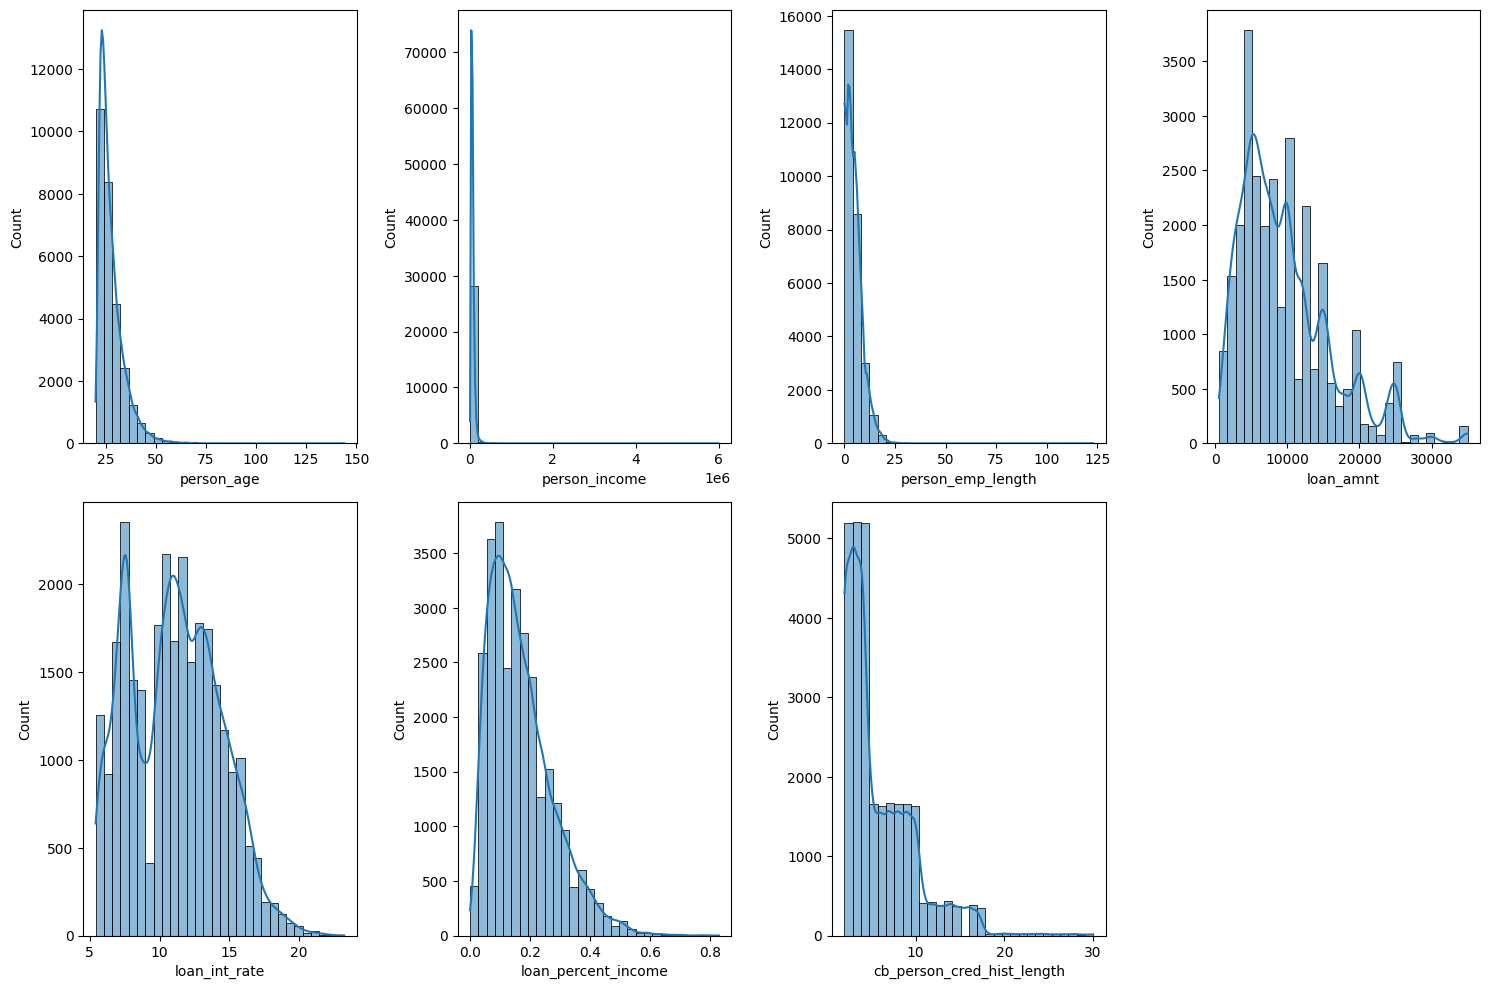

In [10]:
# Understanding Continous Data
continous = ['person_age', 'person_income','person_emp_length', 'loan_amnt','loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

fig,ax = plt.subplots(nrows = 2, ncols = 4, figsize = (15,10))

for i, col in enumerate(continous):
    sns.histplot(data = cleaned_df, x = col, kde = True, bins = 30, ax = ax[i//4,i%4])

fig.delaxes(ax[1,3])
plt.tight_layout()
plt.show()

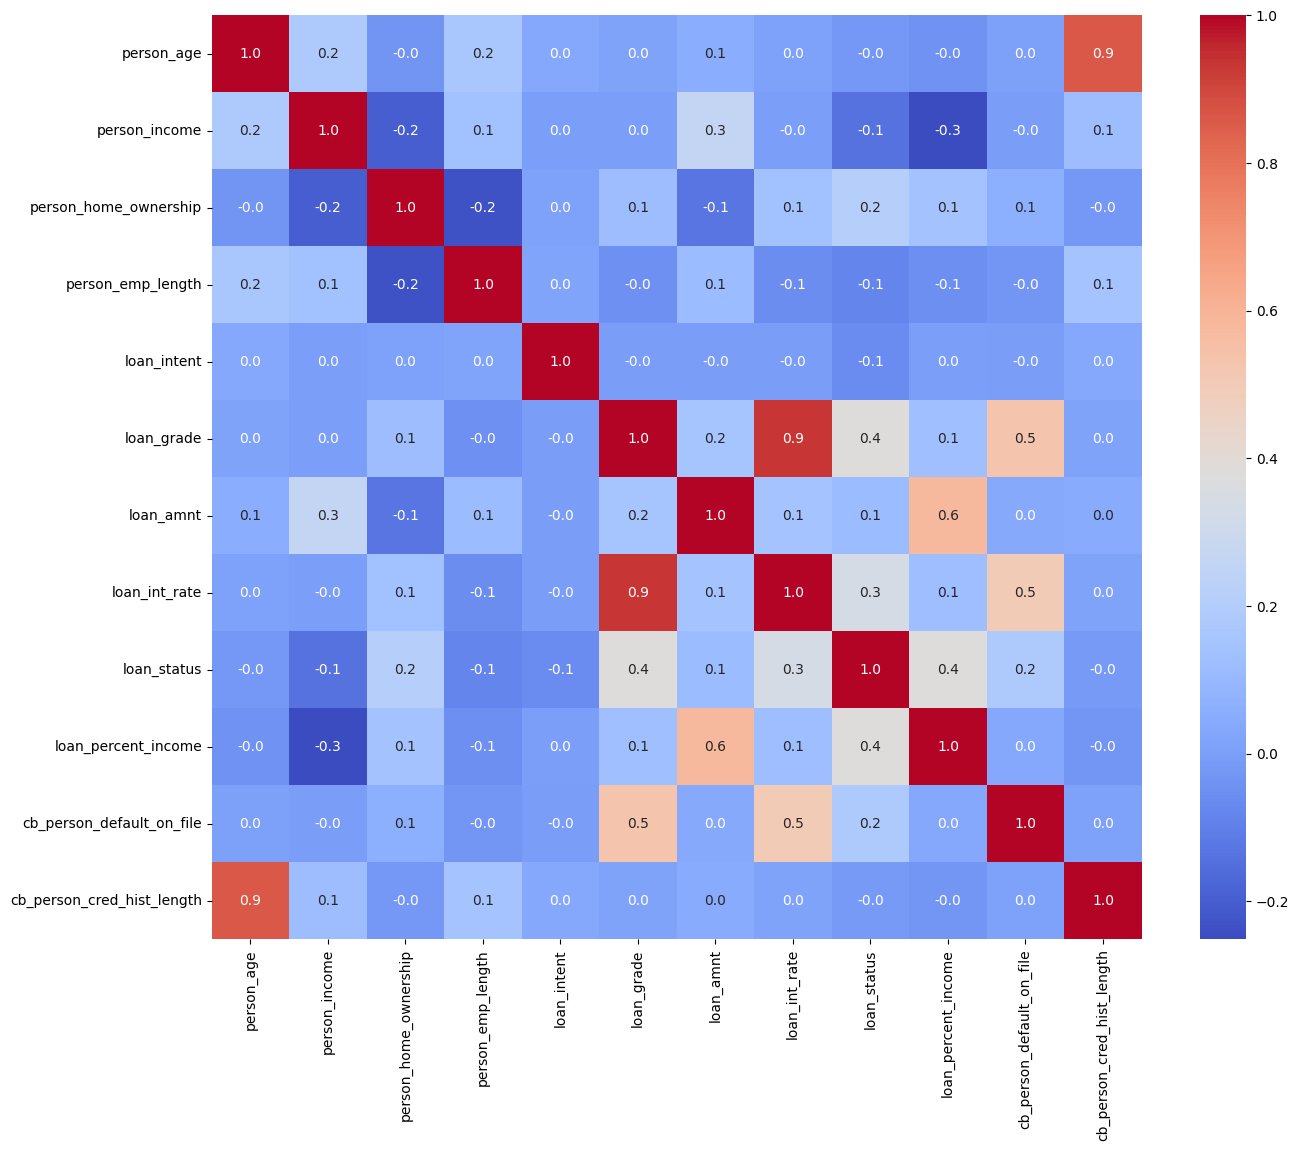

In [11]:
# This code calculates the correlation matrix of a DataFrame (cleaned_df) and visualizes it using a heatmap. Positive correlations are shown in warmer colors (red), while negative correlations are in cooler colors (blue)
corr_matrix = cleaned_df.corr()

plt.figure(figsize = (15,12))
sns.heatmap(corr_matrix, annot = True, fmt = '.1f', cmap = "coolwarm")
plt.show()

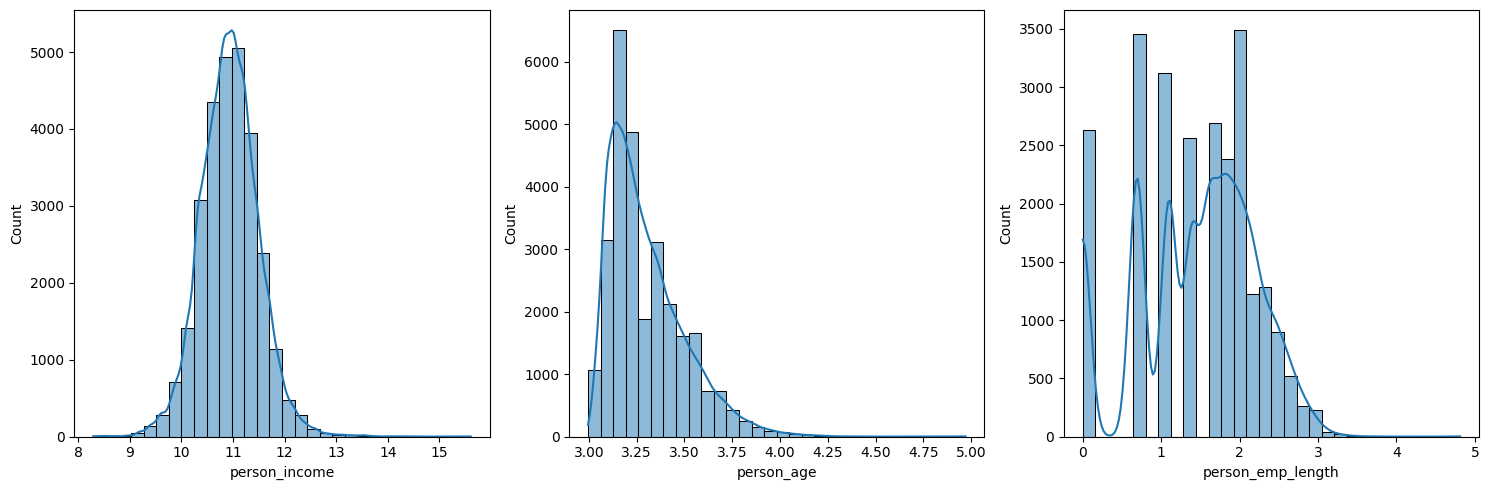

In [12]:
# Understanding Log Data Distribution of Income, Age, Employement Length. The reason of doing it is to get the understanding of the data. 

plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
sns.histplot(x=np.log(cleaned_df['person_income']), bins=30, kde = True)

plt.subplot(1,3,2)
sns.histplot(x=np.log(cleaned_df['person_age']), bins=30, kde = True)

plt.subplot(1,3,3)
sns.histplot(x=np.log(cleaned_df['person_emp_length']), bins=30, kde = True)

plt.tight_layout()
plt.show()

Class Imbalance Ratio: 0.2773271187200287


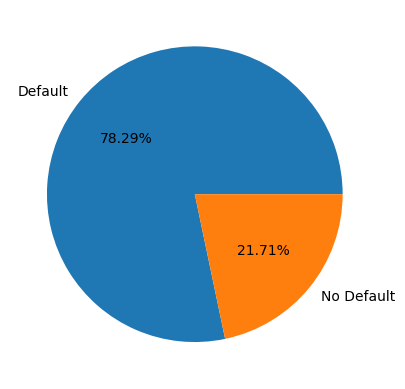

In [13]:
# Understanding Class Imbalance Ratio

status = cleaned_df['loan_status'].value_counts()
print("Class Imbalance Ratio:", status[1]/status[0])
plt.pie(status, autopct = '%.2f%%', labels = ["Default","No Default"])
plt.show()

**6. Data Preprocessing**

In [14]:
# Logarthmic Scaling for skewed data

#Logarithmic transformation is used to reduce the skewness of data and make it more normally distributed, especially when dealing with data that spans multiple orders of magnitude or has outliers. It helps to compress large values, making patterns and relationships between variables easier to analyze. Additionally, it can stabilize variance and improve the performance of statistical models by making data more linear and reducing the impact of extreme values.
preprocess_df = cleaned_df.copy()

preprocess_df['income_log'] = round(np.log(preprocess_df['person_income']+1),2)
preprocess_df['age_log'] = round(np.log(preprocess_df['person_age']+1),2)
preprocess_df['emp_length_log'] = round(np.log(preprocess_df['person_emp_length']+1),2)

preprocess_df.drop(columns = ['person_income','person_age','person_emp_length'], inplace = True)

preprocess_df.head()

,person_home_ownership,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,income_log,age_log,emp_length_log
0,3,4,3,35000,16.02,1,0.59,1,3,10.99,3.14,4.82
1,2,1,1,1000,11.14,0,0.10,0,2,9.17,3.09,1.79
2,0,3,2,5500,12.87,1,0.57,0,3,9.17,3.26,0.69
3,3,3,2,35000,15.23,1,0.53,0,2,11.09,3.18,1.61
4,3,3,2,35000,14.27,1,0.55,1,4,10.90,3.22,2.20


In [15]:
# This code splits the dataset preprocess_df into features (X) and target (y) by separating the loan_status column. It then divides the data into training and testing sets using an 80-20 split. Finally, it applies StandardScaler to scale the feature data to have zero mean and unit variance and prints the shapes of the scaled training and testing datasets.
X = preprocess_df.drop('loan_status', axis = 1)
y = preprocess_df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(22800, 11)
(5701, 11)
(22800,)
(5701,)


7. Model Training and Evaluation

In [16]:
# Preparing the model evaluator. This code defines a function `model_evaluator` that evaluates a machine learning model's performance. It fits the model on the training data, makes predictions on the test data, and prints the ROC AUC score and classification report. Additionally, it displays a confusion matrix with class labels for the binary classification task.
def model_evaluator(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    print("Results:\n")
    print("ROC AUC Score: ", roc_auc_score(y_test, y_preds),'\n')
    print(classification_report(y_test, y_preds))
    
    cm = confusion_matrix(y_test, y_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm)
    disp.plot(cmap = 'Blues')
    
    classes = ['Default', 'No Default']
    plt.xticks([0,1],classes)
    plt.yticks([0,1],classes)

Results:

ROC AUC Score:  0.7116206131180236 

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      4441
           1       0.74      0.47      0.57      1260

    accuracy                           0.85      5701
   macro avg       0.80      0.71      0.74      5701
weighted avg       0.84      0.85      0.83      5701



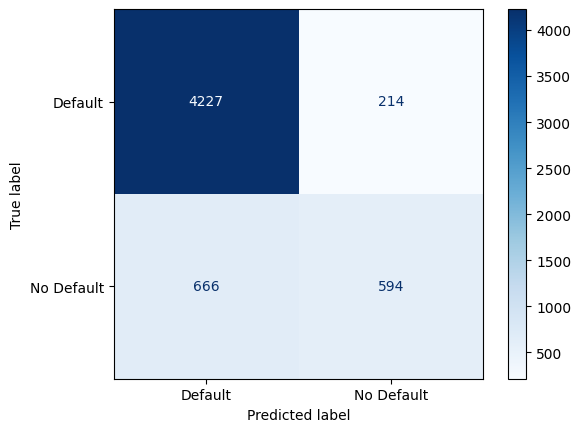

In [17]:
# Logistic Regression Model Results
model_evaluator(LogisticRegression(), X_train_scaled, X_test_scaled, y_train, y_test)

Results:

ROC AUC Score:  0.8456035570424221 

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      4441
           1       0.96      0.70      0.81      1260

    accuracy                           0.93      5701
   macro avg       0.94      0.85      0.88      5701
weighted avg       0.93      0.93      0.92      5701



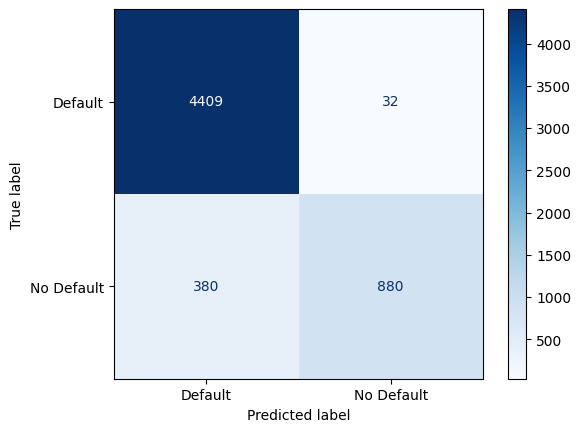

In [18]:
# Random Forest Classifier Model Results
model_evaluator(RandomForestClassifier(),X_train_scaled, X_test_scaled, y_train, y_test)

Results:

ROC AUC Score:  0.8042692908432607 

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      4441
           1       0.66      0.71      0.69      1260

    accuracy                           0.86      5701
   macro avg       0.79      0.80      0.80      5701
weighted avg       0.86      0.86      0.86      5701



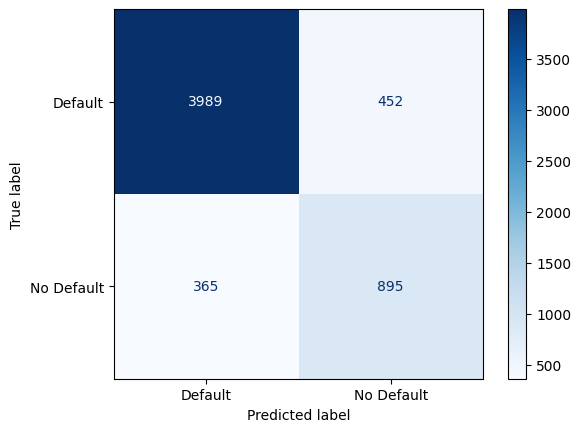

In [19]:
# XGBoost Classifier Model Results
model_evaluator(xgb(), X_train_scaled, X_test_scaled, y_train, y_test)

**8. Hyperparameter Tuning**

Best Params:  {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 300}
Best ROC AUC 0.9450643237654948
Results:

ROC AUC Score:  0.8073460503318644 

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      4441
           1       0.69      0.70      0.70      1260

    accuracy                           0.86      5701
   macro avg       0.80      0.81      0.80      5701
weighted avg       0.87      0.86      0.87      5701



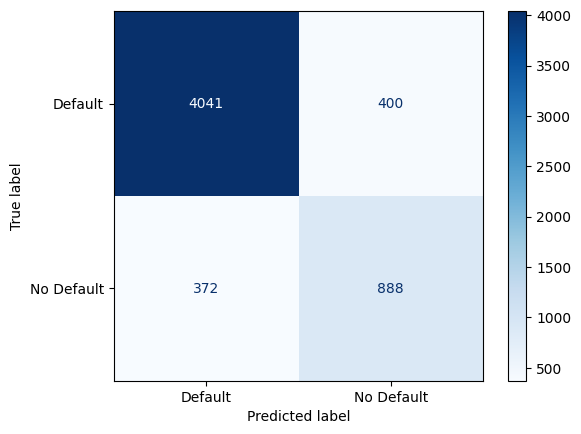

In [20]:
# Hyperparameter Tuning. This code performs hyperparameter tuning using GridSearchCV to find the best combination of parameters for an XGBoost model (xgb). It evaluates the model's performance based on ROC AUC score, prints the best parameters and score, and then evaluates the best model using the model_evaluator function.
#ROC stands for Receiver Operating Characteristic -AUC stands for  Area Under the Curve.
param_grid = {
    'n_estimators' : [100,200,300],
    'learning_rate' : [0.01, 0.1, 0.5],
    'min_child_weight' : [1,3,5],
    'max_depth' : [3,4,5]
}

grid_search = GridSearchCV(estimator = xgb(), param_grid = param_grid, scoring = 'roc_auc', cv = 3, n_jobs = -1)
grid_search.fit(X_train_scaled, y_train)

print("Best Params: ", grid_search.best_params_)
print("Best ROC AUC", grid_search.best_score_)

best_model = grid_search.best_estimator_
model_evaluator(best_model, X_train_scaled, X_test_scaled, y_train, y_test)

**9. Understanding Feature Importance**

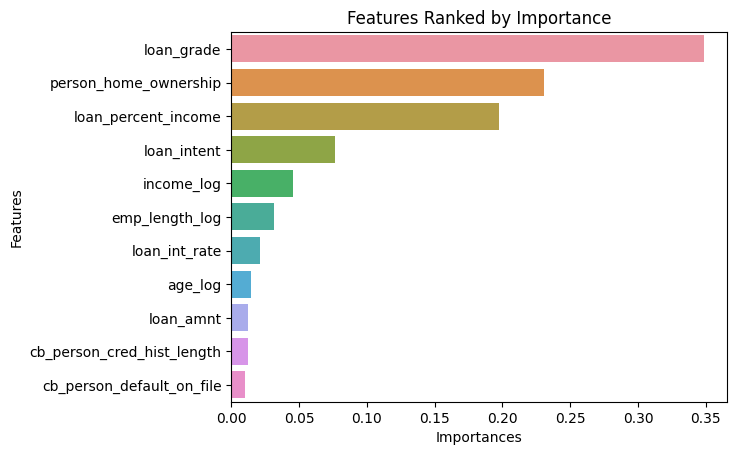

In [21]:
# Plotting feature importance on bar plot
feature_importance = pd.DataFrame({
    'Features': X.columns,
    'Importances': best_model.feature_importances_
})

feature_importance.sort_values('Importances', ascending = False, inplace = True)

sns.barplot(x = 'Importances', y = 'Features', data = feature_importance)
plt.title("Features Ranked by Importance")
plt.show()